# 1. Inference Statistics

## Descriptive Statistics

The scientific method

![title](Scientific_Method_3.jpg)

## The Central Limit Theorem

As we have seen previously, for many most of the probability distributions (discrete and continuous) as we increase our sample size sufficiently, the mean of all samples drawn from this distribution will be approximately equal to the mean of the population.

The distribution of the sample means will approach a normal distribution, with the variances approximatelly equal to the variance of the population divided by the sample's size.

In many instances a sufficiently large sample is generalized to a size larger than 30.

#### Lets Review an example that will allows to introduce our next topic Point Estimates

In [29]:
##Lets generate some data that represent the whole population age distribution
##install.packages("e1071")
library(e1071)
set.seed(12) #set seed for reproducibility
population_ages <- c(rexp(1000000,0.015)+18,   # Generate a population from exponential distribution up to 18 yo
                     rpois(500000,20)+18, ##after that use a poisson dist.
                     rpois(500000,32.5)+18,
                     rpois(500000,45)+18)

#Adjust values greater than 100 by applying a modulo operation
#(ensuring ages remain within a reasonable range by wrapping values over 100 back to a plausible range)

population_ages <- ifelse(population_ages<100, population_ages, population_ages%%100+18)

# Calculate the true mean of the generated population
true_mean <- mean(population_ages)
true_mean

[1] 51.2

In [30]:
head(population_ages)

[1] 81.9 60.4 25.8 26.5 57.1 36.9

In [31]:
set.seed(10)

sample_ages <- sample(population_ages, size=1000)  # Take a sample of 1000 ages

sample_mean <- mean(sample_ages)            # Make a point estimate of the mean

sample_mean

sample_mean-true_mean   # Check difference between estimate and population parameter


[1] 51.2

[1] -0.0386

[1] 0.656

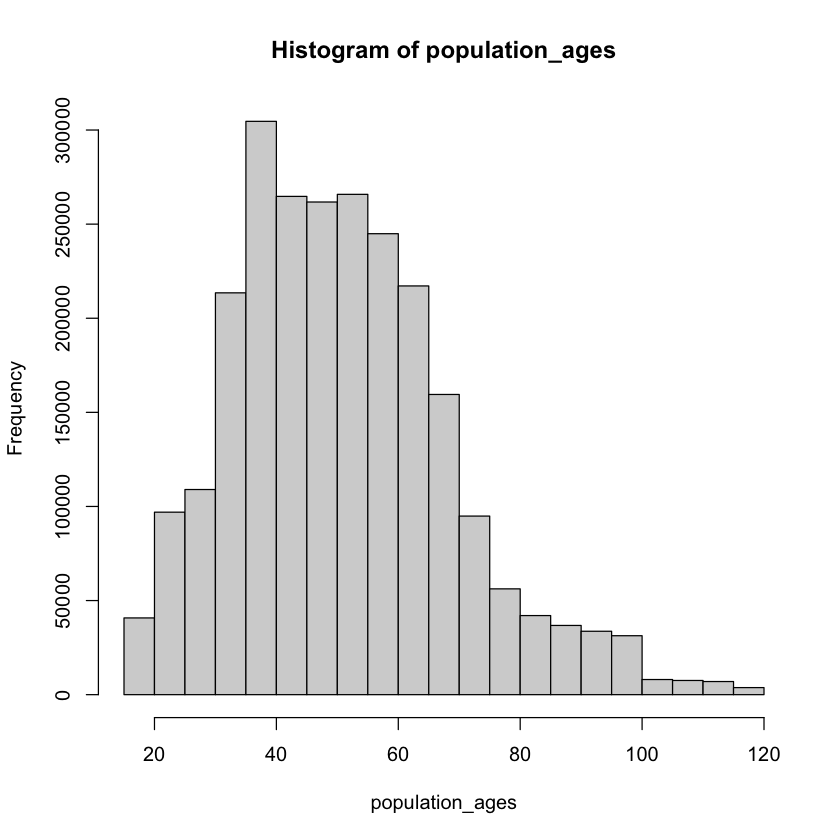

In [32]:
hist(population_ages, breaks=20)  # Create histogram of population

skewness(population_ages)         # Check the skewness A skewness value between 0.5 and 1 is considered moderately positive skewed.


[1] 0.537

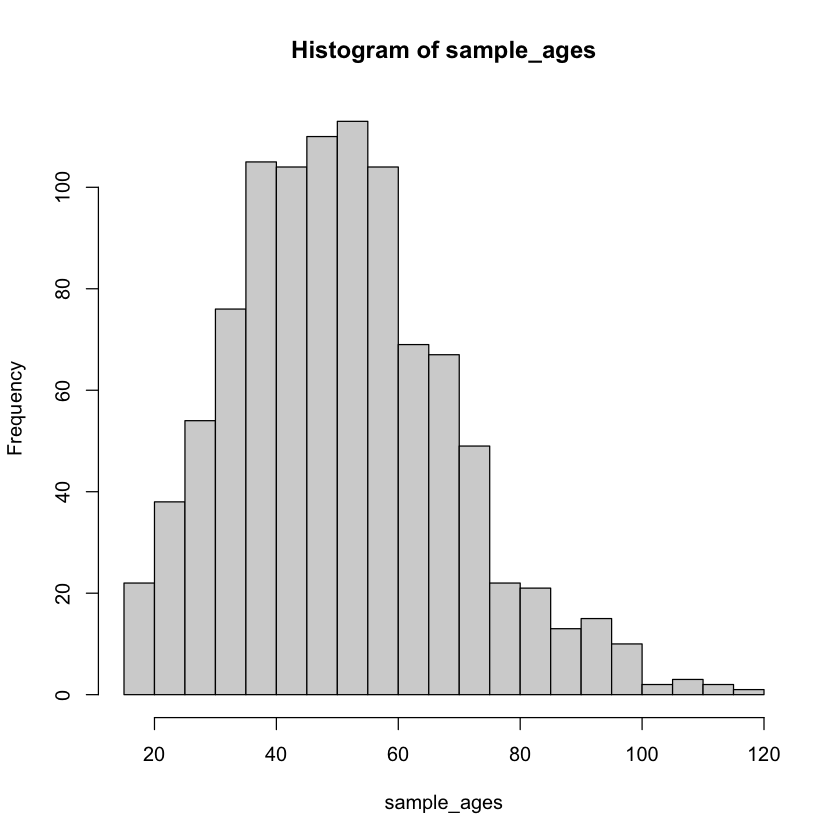

In [33]:
hist(sample_ages, breaks=20)   # Create histogram of the sample

skewness(sample_ages)          # Check the skewness (point estimate of skewness)


[1] 52.5 52.1 51.4 50.8 51.8 51.8

[1] -0.199

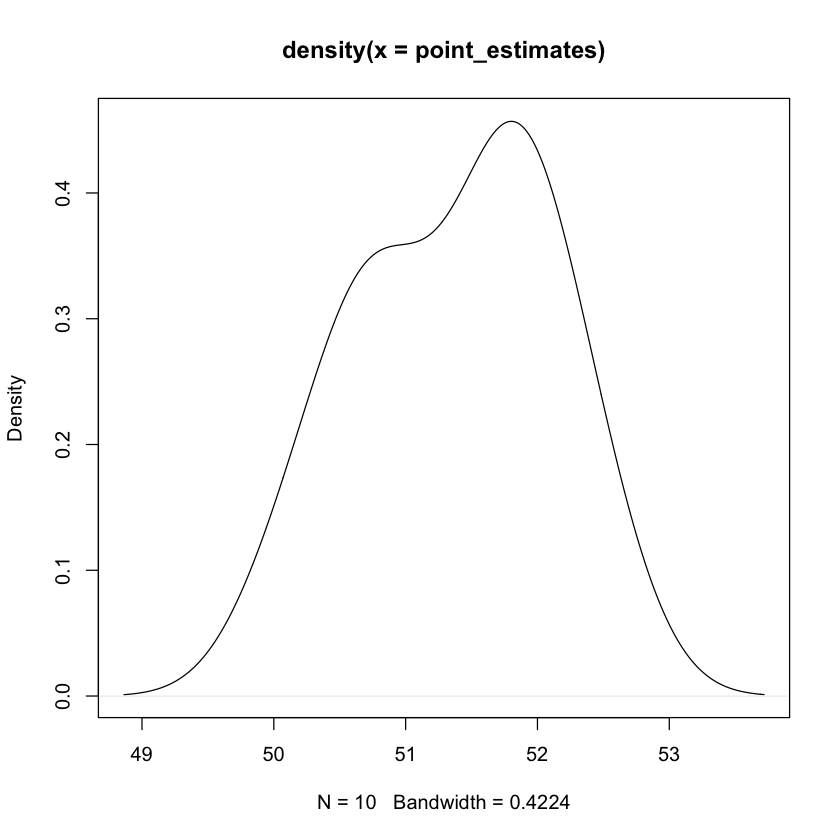

In [34]:
set.seed(12)
point_estimates <- c()    # Create an empty vector to hold results

num_samples <- 10        # Initialize number of samples to take try 10, 50, 100, 1000

for (x in 1:num_samples){         # Draw N samples and make N point estimates
  sample <- sample(population_ages, size=1000)
  point_estimates <- c(point_estimates, mean(sample))
}

plot(density(point_estimates))  # Plot the sampling distribution
head(point_estimates)
skewness(point_estimates)


In [35]:
mean(point_estimates)

mean(point_estimates)-true_mean    # Difference between true mean and sample means


[1] 51.4

[1] 0.157

<h1 style="text-align: center;"> Sampling Distribution </h>

#### Let's generate some random sampling from a small distribution in this case a distribution of 4 values from a variable time

#### Random Sampling
Random Sampling is used to increase the chances of obtaining a representative sample. It assures that everyone in the population of interest is equally likely to be chosen as a subject.  

#### Generalization 
refers to the degree to which the mean of a representative sample is similar to or deviates from the mean of the larger population. This generalization is based on a distribution of sample means for all possible random samples.

This distribution is called a <b> Sampling Distribution.<b>

It describes the variability of sample means that could occur just by chance and thereby serves as a frame of reference for generalizing from a single sample mean to a population mean.

<b>The Central Limit Theorem</b> states that the distribution of sample means approaches a normal distribution when n is large.  

In such a distribution of unlimited number of sample means, <b>the mean of the sample means will equal the population mean</b>

## Standard Error of the Mean

The <b>Standard Error of the Mean (SEM)</b> measures how much the sample mean (𝑥̄) is expected to fluctuate from the true population mean (μ) when drawing random samples. It is calculated as:

![title](ST_Error.png)

Where: 

σ is the population standard deviation

n is the sample size.

In [36]:
# True population parameters
true_mean <- mean(population_ages)
true_sd <- sd(population_ages)

# Take a random sample of size 1000
sample_size <- 1000
sample_ages <- sample(population_ages, sample_size, replace = FALSE)

# Calculate sample mean and standard error
sample_mean <- mean(sample_ages)
sample_sd <- sd(sample_ages)
sem <- sample_sd / sqrt(sample_size)

# Display results
cat("True Population Mean:", true_mean, "\n")
cat("Sample Mean:", sample_mean, "\n")
cat("Sample Standard Deviation:", sample_sd, "\n")
cat("Standard Error of the Mean (SEM):", sem, "\n")

# Compare SEM with population standard deviation
cat("Population SD:", true_sd, "\n")
cat("Ratio of SEM to Population SD:", sem / true_sd, "\n")

True Population Mean: 51.2 
Sample Mean: 51.5 
Sample Standard Deviation: 18.1 
Standard Error of the Mean (SEM): 0.572 
Population SD: 17.9 
Ratio of SEM to Population SD: 0.032 



- The sample mean will be close to the true population mean, but it will vary slightly.
- The SEM will be much smaller than the sample standard deviation because it accounts for the reduced variability when averaging multiple observations.
- Increasing sample_size will reduce SEM, demonstrating that larger samples provide more precise estimates of the mea

### Let's generate a plot that describes the behavior of the Standard Error of the Mean (SEM) as a function of Sample Size

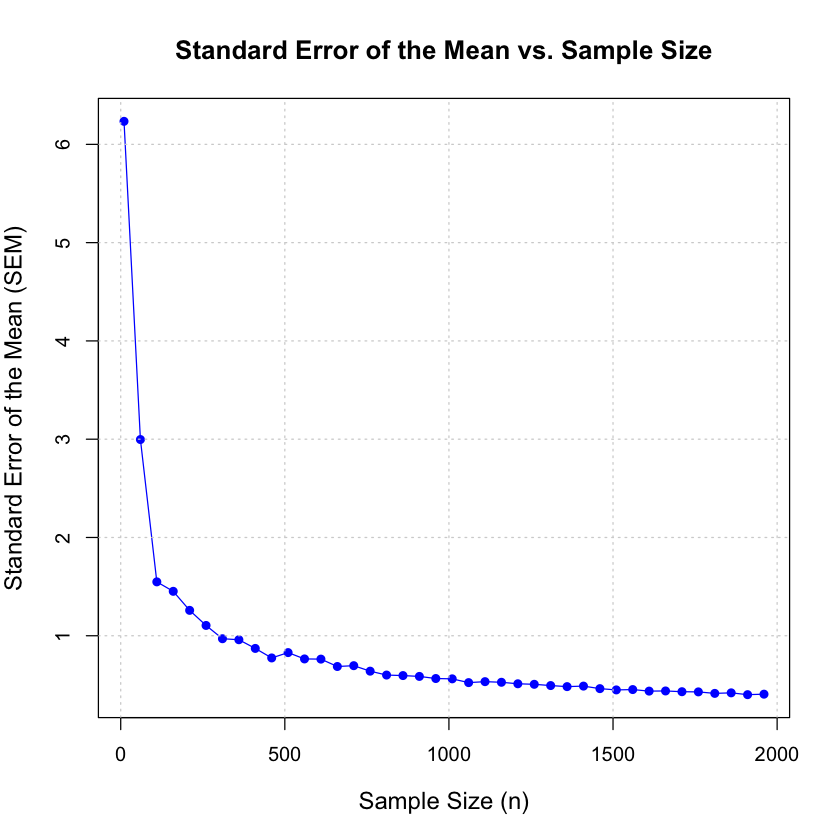

In [37]:

# Define different sample sizes
sample_sizes <- seq(10, 2000, by=50)
sem_values <- numeric(length(sample_sizes))

# Compute SEM for different sample sizes
for (i in seq_along(sample_sizes)) {
  sample_n <- sample_sizes[i]
  sample_ages <- sample(population_ages, sample_n, replace = FALSE)
  sample_sd <- sd(sample_ages)  # Sample standard deviation
  sem_values[i] <- sample_sd / sqrt(sample_n)  # Compute SEM
}

# Plot SEM vs. Sample Size
plot(sample_sizes, sem_values, type = "o", pch = 16, col = "blue",
     xlab = "Sample Size (n)", ylab = "Standard Error of the Mean (SEM)",
     main = "Standard Error of the Mean vs. Sample Size",
     cex.lab = 1.2, cex.main = 1.3)
grid()


## Bootstrapping is an important technique to extract point estimators

In [38]:
library(mosaic)
time = c(190.5, 109, 95.5, 137)
resample(time)
mean(time)
sd(time)

[1] 109 109 137 109

[1] 133

[1] 42

In [39]:
bootstrap = do(10) * mean(resample(time))
head(bootstrap)
sd_B = sd(bootstrap$mean)
Standard_Error_Mean = sd_B/sqrt(10)
Standard_Error_Mean

,mean
,<dbl>
1,146
2,164
3,130
4,190
5,113
6,143


[1] 7.68

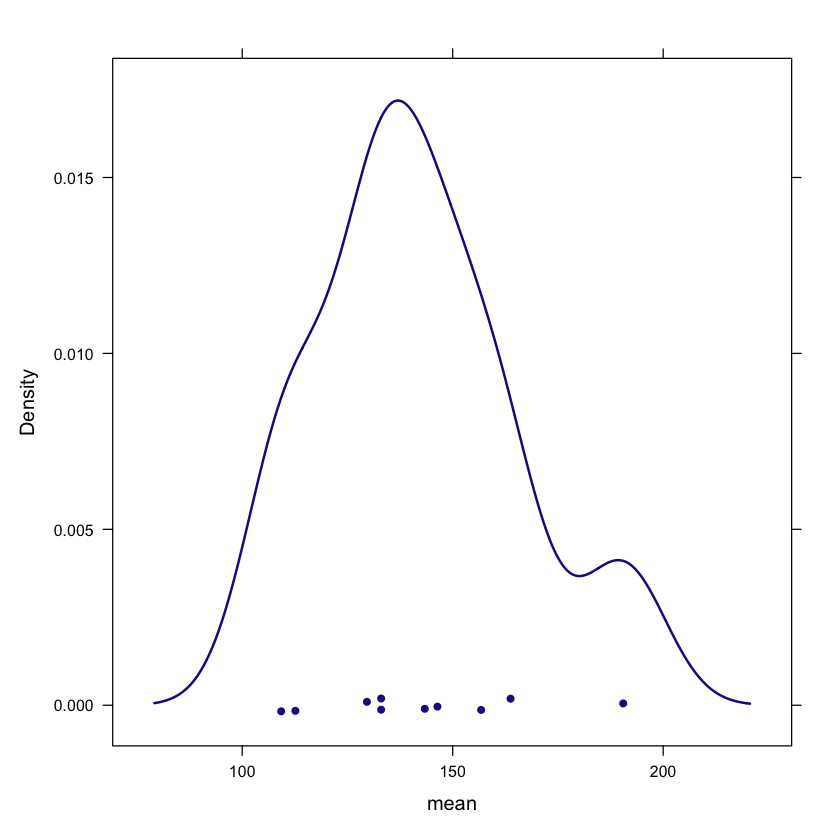

In [40]:
densityplot(~mean, data=bootstrap)

In [41]:
bootstrap = do(100) * mean(resample(time))
head(bootstrap)
sd_B = sd(bootstrap$mean)
Standard_Error_Mean = sd_B/sqrt(100)
Standard_Error_Mean

,mean
,<dbl>
1,109
2,129
3,133
4,109
5,130
6,164


[1] 1.93

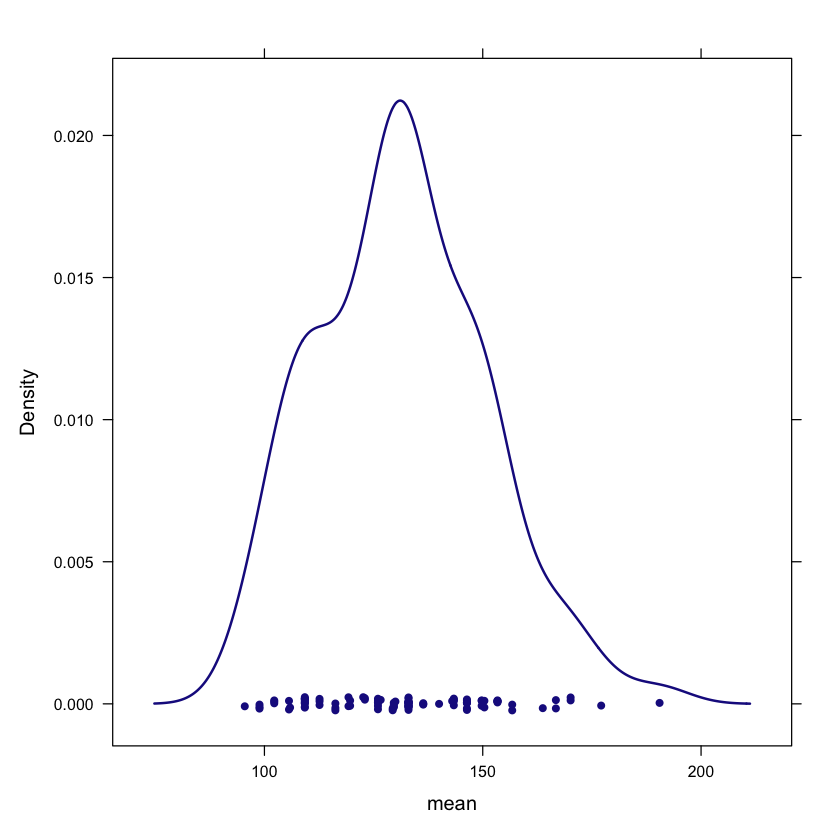

In [42]:
densityplot(~mean, data=bootstrap)

In [43]:
bootstrap = do(10000) * mean(resample(time))
head(bootstrap)
sd_B = sd(bootstrap$mean)
Standard_Error_Mean = sd_B/sqrt(10000)
Standard_Error_Mean

,mean
,<dbl>
1,113
2,129
3,143
4,133
5,120
6,133


[1] 0.183

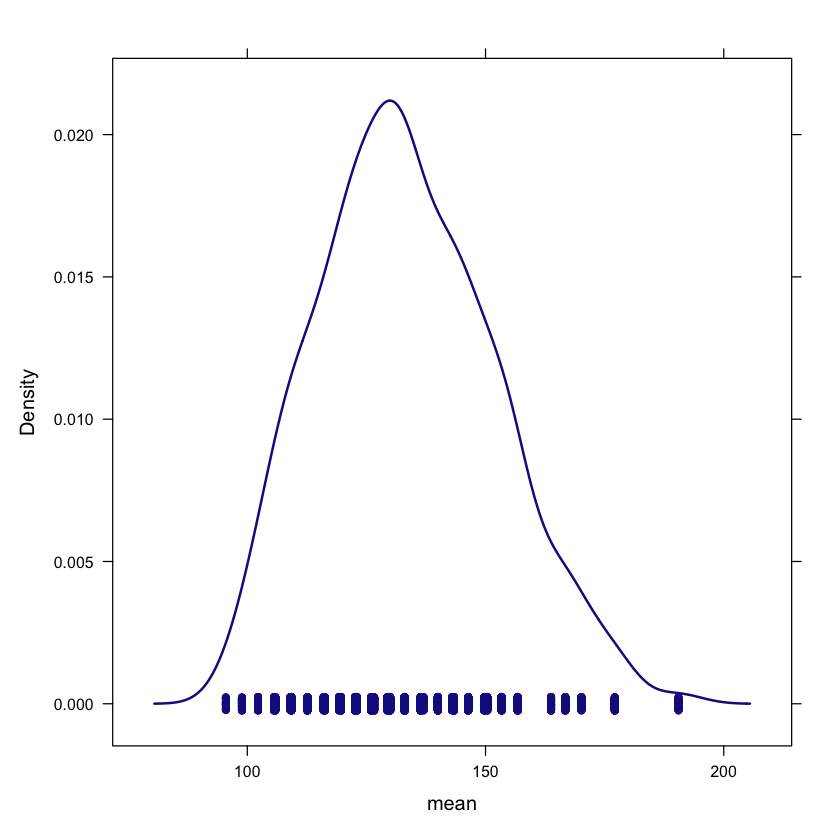

In [44]:
densityplot(~mean, data=bootstrap,bw = 5)

## Confidence intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. 

A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.


Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.


If you know the standard deviation of the population, the margin of error is equal to:

$$ z * \frac {\sigma}{\sqrt{\bar{n}}} $$

In [45]:
#install.packages("mosaic")
library(mosaic)

# Set the color theme for trellis (lattice) plots using mosaic's default theme
trellis.par.set(theme=col.mosaic())
# Set global options to display numerical outputs with 3 decimal places
options(digits=3)

###
mu = 500 # Mean of the normal distribution
sigma = 100 # Standard deviation of the normal distribution

# Generate a random sample of 500 values from a normal distribution N(μ = 500, σ = 100)
x = rnorm(500, mean=mu, sd=sigma)



In [46]:
##produces a complete set of stats from a vector
favstats(x)

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,163,425,497,565,849,497,103,500,0


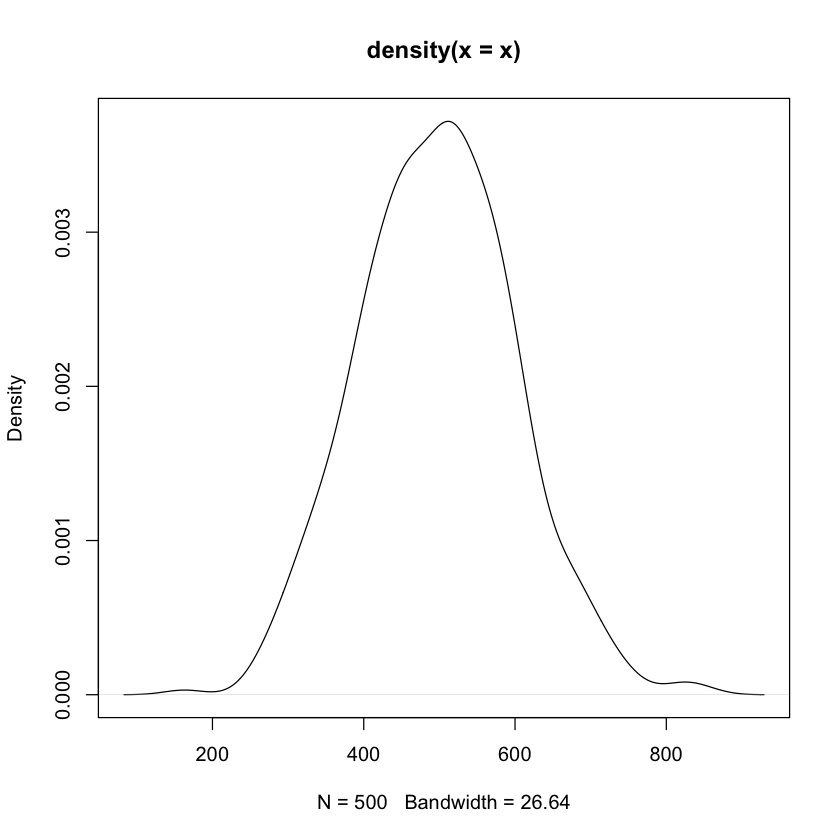

In [47]:
#introducing a kernel density estimator
plot(density(x))

In [48]:
##Estimating confidence intervals

# Define a function to calculate the confidence interval for a population mean
meanconfint = function (x, sigma, level = 0.95, ...) {
  se = sigma / sqrt(length(x)) # Compute standard error of the mean (SEM)
  mu = mean(x)                 # Compute sample mean
  z = qnorm(1 - (1 - level)/2) # Compute the critical z-score for the given confidence level
  out = c(mu, mu - z * se, mu + z * se)  # Construct confidence interval [mean, lower bound, upper bound]
  names(out) = c("mean", "lower", "upper")
  return(out) # Return the confidence interval
}

# Call the function using the generated sample 'x' and the known population standard deviation 'sigma'
meanconfint(x, sigma = sigma)

# Compute the critical z-score for a 95% confidence interval (two-tailed test)
z_critical <- qnorm(0.975)
z_critical

mean lower upper 
  497   488   506

[1] 1.96

In [49]:
### Using the 'do()' function from the mosaic package to repeat a process multiple times ###

# Generate 50 random samples, each containing 500 values from a normal distribution N(μ=500, σ=100)
randomx = do(50) * rnorm(500, mean=mu, sd=sigma)

# Compute confidence intervals for each sample using the 'meanconfint()' function
ci = data.frame(t(apply(randomx, 1, meanconfint, sigma=sigma)))
head(ci)

,mean,lower,upper
,<dbl>,<dbl>,<dbl>
1,498,489,507
2,495,486,504
3,503,494,512
4,491,483,500
5,503,494,512
6,503,494,512


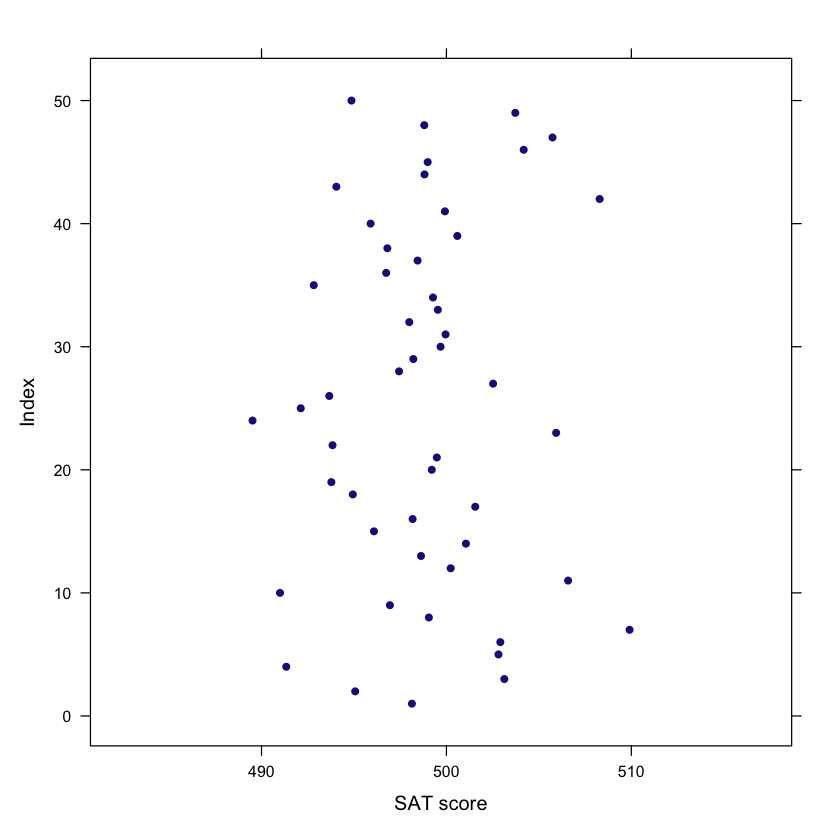

In [50]:
###plot confidence intervals -- sometimes the 
### simulation it doesn't cover the actual mean
xyplot(1:nrow(ci) ~ mean, data=ci, xlim=range(ci), xlab="SAT score", ylab="Index")
#ladd(panel.abline(v=500, col="lightgray", lty=2))
#ladd(with(ci, panel.arrows(x0 = lower, y0=1:nrow(ci), y1=1:nrow(ci), cex=0.5,
#                             x1=upper, code=3)))


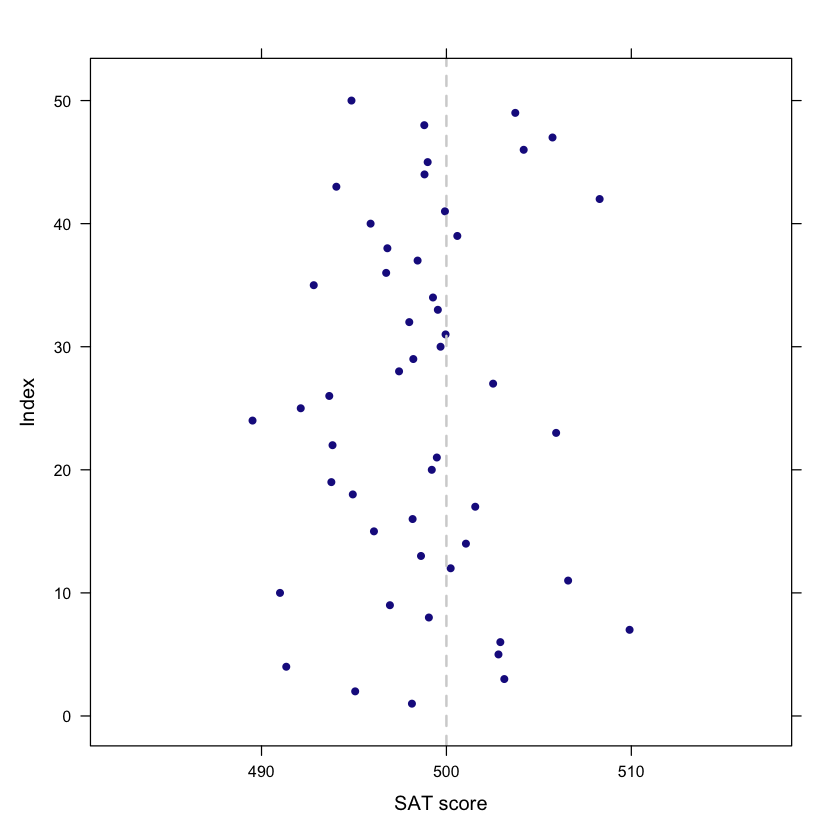

In [51]:
#xyplot(1:nrow(ci) ~ mean, data=ci, xlim=range(ci), xlab="SAT score", ylab="Index")
ladd(panel.abline(v=500, col="lightgray", lty=2))

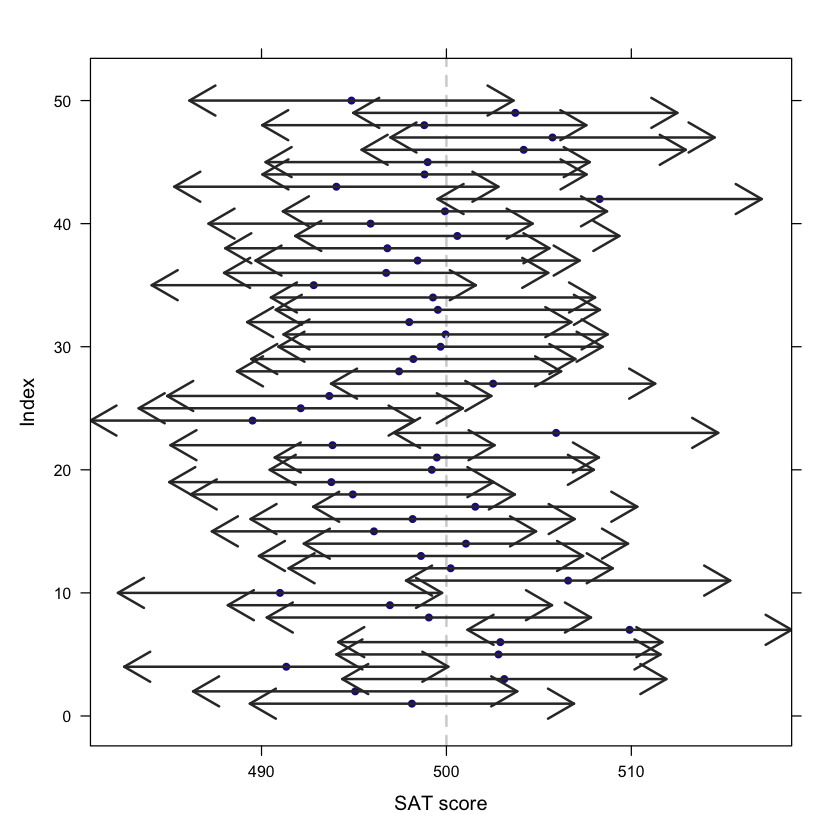

In [52]:
ladd(with(ci, panel.arrows(x0 = lower, y0=1:nrow(ci), y1=1:nrow(ci), cex=0.5,
                             x1=upper, code=3)))

## Hypothesis Testing

Once we have collected our data based on our initial hypothesis, is time to start exploring relationships across variables and they type of data that we have gathered.

We saw that point estimators allows us to have a general idea of the type of data and tha ranges where the data operates.

Next week, we will review multiple methods that allows us to detect possible error in the data and explore types of estimators that will help us with our analysis.

The central idea of hypothesis testing is to mathematically test whether our expectations are approximatelly close to the real population parameters. 

The classical approach is to generate intrinsic hypothesis which will allow to compartamentalize the decision regarding the validity of the approach.

### $H_o$ *null hypothesis* It is normally the default value - usually is the condition that is false

### $H_1$ *Alternative hypothese* It is normally the hypothesis we want to test (the one that is true)



##### We want to be able to determine with some percentage of confidence (normally it is 95) if we can reject the null hypothesis, in favor of the Alternative hypothesis.

In [53]:
###Is the coin biased?? Hypothesis testing
library(mosaic)
n_tosses = 1000

lower_bound = qbinom(0.025, n_tosses, 0.5)
upper_bound = qbinom(0.975, n_tosses, 0.5)


lower_bound
upper_bound



[1] 469

[1] 531

In [54]:
coin_flip = function(){
  ifelse(runif(1)>0.51,1,0)
}

coin_flip_biased = function(){
  rbinom(1,1,0.7)
}

In [55]:
observed_head_count = sum(do(n_tosses) * coin_flip())
#observed_head_count = sum(do(n_tosses) * coin_flip_biased())

head(observed_head_count)
print(paste(lower_bound,upper_bound,sep = " "))
if (observed_head_count >= lower_bound & observed_head_count <= upper_bound){
  print("Failed to reject the null!")
}else{
  print("Null rejected!")
}

[1] 498

[1] "469 531"
[1] "Failed to reject the null!"


In [56]:
#observed_head_count = sum(do(n_tosses) * coin_flip())
observed_head_count = sum(do(n_tosses) * coin_flip_biased())

head(observed_head_count)
if (observed_head_count >= lower_bound & observed_head_count <= upper_bound){
  print("Failed to reject the null!")
}else{
  print("Null rejected!")
}

[1] 713

[1] "Null rejected!"


### Formally, hypothesis testing can be expressed: if X is a random variable and R is the range of X. $R_{reject} \subset $ R is the rejection region. If $X \in R_{reject}$ then the null hypothesis.